## Прогноз продаж компьютерных игр
<a href='#section1'>1. Изучение общей информации</a>

<a href='#section2'>2. Подготовка данных</a>

<a href='#section3'>3. Исследовательский анализ данных</a>

<a href='#section4'>4. Портрет пользователя каждого региона</a>

<a href='#section5'>5. Проверка гипотез</a>

<a href='#section6'>6. Общий вывод</a>

<a id='section1'></a>
### 1. Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats as st

df = pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Файл с данными содержит менее 17 тысяч строк и 11 колонок, названия которыех нужно привести к нижнему регистру.
<a id='section2'></a>
### 2. Подготовка данных

In [2]:
# заменяем названия столбцов
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

def year_release(elem):
    if np.isnan(elem['year_of_release']):
        res = re.findall('\d{4}$', elem['name'])
        if (len(res) > 0):
            return int(res[0])
        
    return elem['year_of_release']


df['year_of_release'] = df.apply(year_release, axis = 1)
# удаляем строки с пропусками в двух столбцах
df.dropna(subset = ['name', 'year_of_release'], inplace = True)
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].replace('tbd', -1)
df['user_score'] = df['user_score'].astype('float')

df['sales'] = df.apply(lambda x: x['na_sales'] + x['eu_sales'] + x['jp_sales'] + x['other_sales'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16459 entries, 0 to 16714
Data columns (total 12 columns):
name               16459 non-null object
platform           16459 non-null object
year_of_release    16459 non-null int64
genre              16459 non-null object
na_sales           16459 non-null float64
eu_sales           16459 non-null float64
jp_sales           16459 non-null float64
other_sales        16459 non-null float64
critic_score       7994 non-null float64
user_score         9850 non-null float64
rating             9778 non-null object
sales              16459 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Год выпуска преобразовываем в целое число, потому что год не может быть дробным, а user_score во float, т.к. это нужно для расчётов.

Пропуски в трёх столбцах с рейтингами оставим как есть, потому что их правдоподобно заменить, по-моему, врядли получится.

Пропуски года выпуска заполняем если в имени присутствует год, но это всего 15 строчек. Остальные более 200 строк удаляем. Также удаляем строки с пропуском имени, их всего 2.       
        
К пропускам в столбце год выпуска могло привести то, что при составлении таблицы данные пропустили случайно. 
А рейтигов у игр в разные годы могло и не быть, например, на платформе, где игру скачивали не было такой функции.
Критики могли не оценить игру, не обратить на неё внимание и т.д. Думаю, возрастной рейтинг по той же причине есть не у всех игр.

tbd - будет определено (он англ. to be determined), заменим его на -1, чтобы это было число, но при этом не учитывать его в расчётах

Добавлен столбец с суммой продаж по всем регионам.

<a id='section3'></a>
### 3. Исследовательский анализ данных

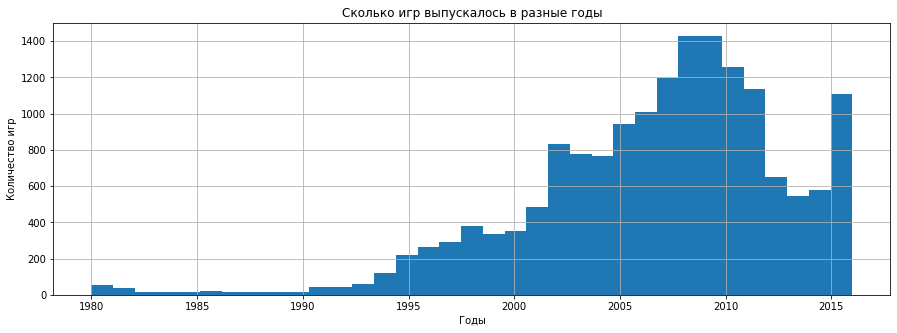

In [3]:
df['year_of_release'].hist(bins=35, figsize=(15,5), grid=True)
plt.title('Сколько игр выпускалось в разные годы')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.show()

До 1994 года выпускалось очень мало игр, поэтому период не очень важен для исследования.

7 самых популярных платформ


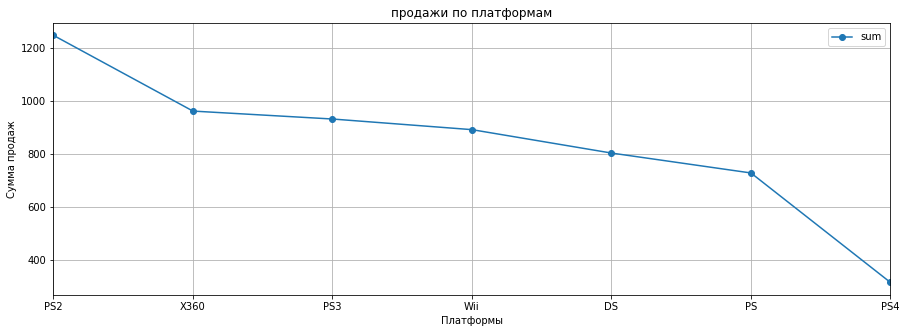

In [4]:
platform_sales = df.pivot_table(index = 'platform',                    
                         values='sales',
                         aggfunc = ['sum'])
platform_sales.columns = ['sum']
platform_sales.sort_values(by='sum', ascending=False, inplace=True)

print('7 самых популярных платформ')
platform_sales.head(7).plot(title='продажи по платформам', style='o-', figsize=(15,5), grid=True)
plt.xlabel('Платформы')
plt.ylabel('Сумма продаж')
plt.show()

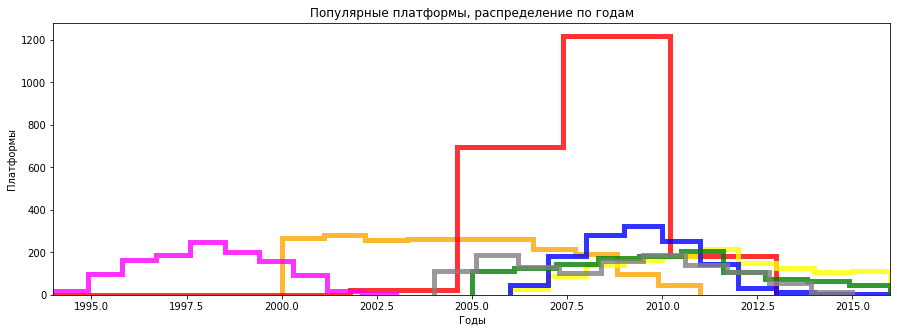

In [5]:
def plot_hist(df, color):    
    df.plot(kind='hist', histtype='step', linewidth='5', alpha=0.8, figsize=(15,5), xlim=(1994,2016),
            color = color)


plot_hist(df.loc[df['platform'] == 'PS2']['year_of_release'], color = 'orange')
plot_hist(df.loc[df['platform'] == 'DS']['year_of_release'], color = 'red')
plot_hist(df.loc[df['platform'] == 'PS3']['year_of_release'], color = 'yellow')
plot_hist(df.loc[df['platform'] == 'Wii']['year_of_release'], color = 'blue')
plot_hist(df.loc[df['platform'] == 'X360']['year_of_release'], color = 'green')
plot_hist(df.loc[df['platform'] == 'PSP']['year_of_release'], color = 'gray')
plot_hist(df.loc[df['platform'] == 'PS']['year_of_release'], color = 'magenta')
plt.title('Популярные платформы, распределение по годам')
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.show()


Срок существования платформы примерно 8 - 11 лет.

Актуальный период определим с 2010 года.

Растут платформы PS3 и X360, они потенциально прибыльные. Остальные падают или уже не существуют. По продажам с 2004 по 2011 год лидировала платформа DS.

In [6]:
df = df.query('year_of_release > 2009')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5278 entries, 14 to 16714
Data columns (total 12 columns):
name               5278 non-null object
platform           5278 non-null object
year_of_release    5278 non-null int64
genre              5278 non-null object
na_sales           5278 non-null float64
eu_sales           5278 non-null float64
jp_sales           5278 non-null float64
other_sales        5278 non-null float64
critic_score       2313 non-null float64
user_score         3180 non-null float64
rating             3113 non-null object
sales              5278 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 536.0+ KB


Платформы - лидеры продаж


,sum
platform,
PS3,587.74
X360,550.46
PS4,314.14
3DS,257.81
Wii,222.97


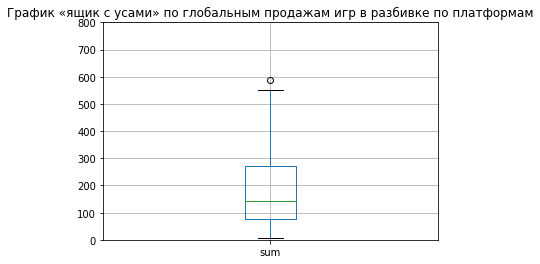

In [7]:
platform_sales = df.pivot_table(index = 'platform',                    
                         values='sales',
                         aggfunc = ['sum'])
platform_sales.columns = ['sum']
platform_sales.sort_values(by='sum', ascending=False, inplace=True)
plt.ylim(0, 800)
plt.title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам') 
platform_sales.boxplot()
print('Платформы - лидеры продаж')
platform_sales.head()

На диаграмме размаха медиана находится на уровне 200 миллионов копий, а выбросы начинаются на уровне более 700 миллионов.

Коэффициент корреляции продаж и оценки критиков 0.40
Коэффициент корреляции продаж и оценки пользователей 0.17


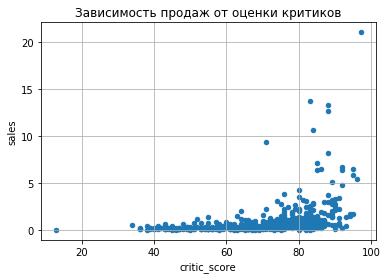

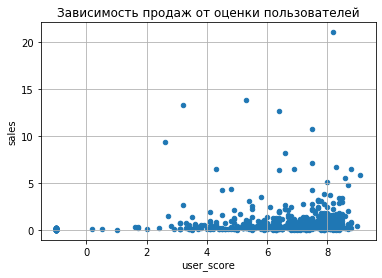

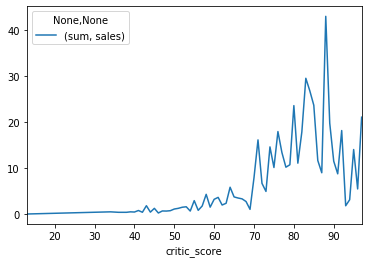

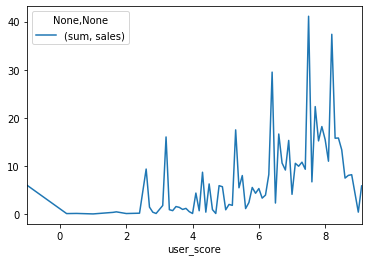

In [8]:
float_formatter = "{:.2f}".format # функция
df_ps3 = df.query("platform == 'PS3'")
sales_critic_score = df_ps3.pivot_table(index = 'critic_score',                    
                         values='sales',
                         aggfunc = ['sum'])
sales_user_score = df_ps3.pivot_table(index = 'user_score',                    
                         values='sales',
                         aggfunc = ['sum'])

df_ps3.plot(title='Зависимость продаж от оценки критиков', x='critic_score', y='sales', kind='scatter', grid=True)
df_ps3.plot(title='Зависимость продаж от оценки пользователей', x='user_score', y='sales', kind='scatter', grid=True)
sales_critic_score.plot()
sales_user_score.plot()
print('Коэффициент корреляции продаж и оценки критиков', float_formatter(df_ps3['sales'].corr(df_ps3['critic_score'])))
print('Коэффициент корреляции продаж и оценки пользователей', float_formatter(df_ps3['sales'].corr(df_ps3['user_score'])))

Возьмём платформу PS3. Судя по коэффициентам корреляции зависимость продаж от оценки критиков есть, но довольно слабая. Оценка пользователей влияет ещё слабее. 

Коэффициент корреляции продаж и оценки критиков 0.29
Коэффициент корреляции продаж и оценки пользователей 0.18


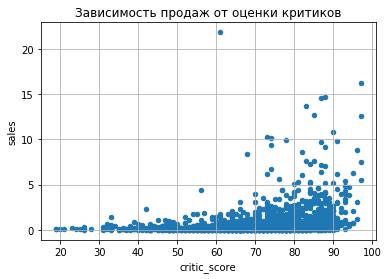

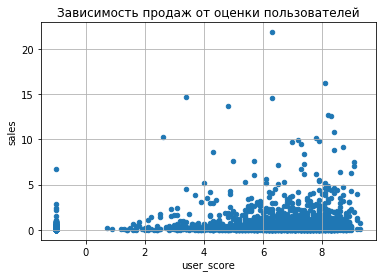

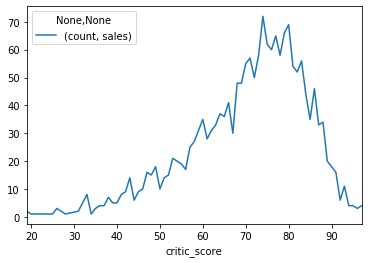

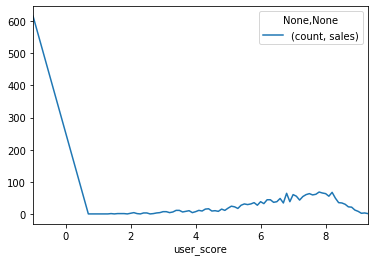

In [9]:
df_other = df.query("platform != 'PS3'")

sales_critic_score = df_other.pivot_table(index = 'critic_score',                    
                         values='sales',
                         aggfunc = ['count'])
sales_user_score = df_other.pivot_table(index = 'user_score',                    
                         values='sales',
                         aggfunc = ['count'])

df_other.plot(title='Зависимость продаж от оценки критиков', x='critic_score', y='sales', kind='scatter', grid=True)
df_other.plot(title='Зависимость продаж от оценки пользователей', x='user_score', y='sales', kind='scatter', grid=True)
sales_critic_score.plot()
sales_user_score.plot()
print('Коэффициент корреляции продаж и оценки критиков', float_formatter(df_other['sales'].corr(df_other['critic_score'])))
print('Коэффициент корреляции продаж и оценки пользователей', float_formatter(df_other['sales'].corr(df_other['user_score'])))


По другим плаформам зависимость продаж от оценки критиков есть и пользователей есть, но очень слабая. Можно сделать вывод, что оценки влияют мало. 

In [10]:
genre_sales = df.pivot_table(index = 'genre',                    
                         values='sales',
                         aggfunc = ['sum'])
genre_sales.columns = ['sum']
genre_sales.sort_values(by='sum', ascending=False, inplace=True)
genre_sales


,sum
genre,
Action,673.09
Shooter,479.74
Sports,328.39
Role-Playing,315.28
Misc,234.56
Racing,122.73
Platform,119.72
Fighting,81.59
Simulation,71.75


Самые прибыльные жанры: Action, Sports и Shooter.

Жанры с самыми низкими продажами: Puzzle, Adventure и Strategy.

Разница в продажах составляет около 10 раз.



<a id='section4'></a>
### 4. Портрет пользователя каждого региона
#### Самые популярные платформы

In [11]:
platform_sales_na = df.pivot_table(index = 'platform', values='na_sales', aggfunc = ['sum'])
platform_sales_na.columns = ['sum']
platform_sales_na.sort_values(by='sum', ascending=False, inplace=True)
print('Северная Америка')
platform_sales_na.head()

Северная Америка


,sum
platform,
X360,334.18
PS3,229.25
Wii,121.20
PS4,108.74
XOne,93.12


In [12]:
platform_sales_eu = df.pivot_table(index = 'platform', values='eu_sales', aggfunc = ['sum'])
platform_sales_eu.columns = ['sum']
platform_sales_eu.sort_values(by='sum', ascending=False, inplace=True)
print('Европа')
platform_sales_eu.head()

Европа


,sum
platform,
PS3,213.60
X360,163.45
PS4,141.09
PC,68.82
Wii,65.91


In [13]:
platform_sales_jp = df.pivot_table(index = 'platform', values='jp_sales', aggfunc = ['sum'])
platform_sales_jp.columns = ['sum']
platform_sales_jp.sort_values(by='sum', ascending=False, inplace=True)
print('Япония')
platform_sales_jp.head()

Япония


,sum
platform,
3DS,100.62
PS3,59.26
PSP,42.20
DS,27.90
PSV,21.84


#### Самые популярные жанры

In [14]:
genre_sales_na = df.pivot_table(index = 'genre', values='na_sales', aggfunc = ['sum'])
genre_sales_na.columns = ['sum']
genre_sales_na.sort_values(by='sum', ascending=False, inplace=True)
print('Северная Америка')
genre_sales_na.head()

Северная Америка


,sum
genre,
Action,290.64
Shooter,237.47
Sports,156.81
Misc,123.80
Role-Playing,112.05


In [15]:
genre_sales_eu = df.pivot_table(index = 'genre', values='eu_sales', aggfunc = ['sum'])
genre_sales_eu.columns = ['sum']
genre_sales_eu.sort_values(by='sum', ascending=False, inplace=True)
print('Европа')
genre_sales_eu.head()

Европа


,sum
genre,
Action,233.63
Shooter,171.45
Sports,116.84
Role-Playing,75.48
Misc,66.09


In [16]:
genre_sales_jp = df.pivot_table(index = 'genre', values='jp_sales', aggfunc = ['sum'])
genre_sales_jp.columns = ['sum']
genre_sales_jp.sort_values(by='sum', ascending=False, inplace=True)
print('Япония')
genre_sales_jp.head()

Япония


,sum
genre,
Role-Playing,103.54
Action,72.20
Misc,24.29
Platform,15.81
Adventure,15.67


#### Зависимость продаж в отдельном регионе от рейтинга ESRB

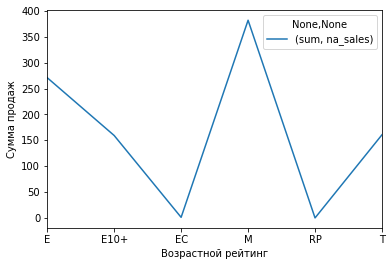

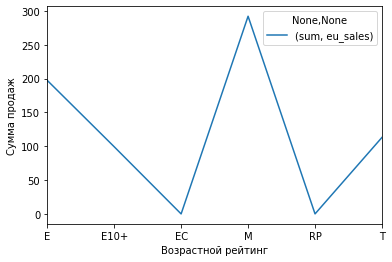

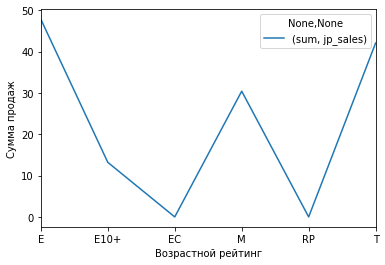

In [17]:
df.pivot_table(index = 'rating', values='na_sales', aggfunc = ['sum']).plot()
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Сумма продаж')

df.pivot_table(index = 'rating', values='eu_sales', aggfunc = ['sum']).plot()
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Сумма продаж')

df.pivot_table(index = 'rating', values='jp_sales', aggfunc = ['sum']).plot()
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Сумма продаж')
plt.show()

   - Самые популярные платформы в каждом регионе частично пересекаются. PS3 занимает 1 - 2 места во всех регионах. В Европе и Америке в пятёрку лидеров входят платформы Wii, PS4 и X360, т.е. в этих регионах популярны почти одинаковые платформы. В Японии самая популярная платформа 3DS.
   

   - В Северной Америке и Европе все популярные жанры совпадают. В отличии от них в Японии в пятёрку входят жанры Platform и Adventure. Самый популярный жанр игр в Японии Role-Playing, в Америке и Европе он тоже входит в пятёрку лидеров, но его попярность в несколько раз ниже чем у Action - лидера в этих регионах.
   
   
   - Рейтинг ESRB влияет на продажи в отдельном регионе: в Северной Америке и Европе графики примерно одинаковые - на первом месте игры для взрослых(M), на втором для всех(E) и на третьем игры для подростков(T). В Японии наиболее популярны игры для всех и для подростков, на третьем месте игры для взрослых.


<a id='section5'></a>
### 5. Проверка гипотез


In [18]:
pc = df.query("platform == 'PC' and user_score > 0")['user_score']
xone = df.query("platform == 'XOne' and user_score > 0")['user_score']
print('Дисперсия пользовательского рейтинга по платформам:')
print('PC - ', float_formatter(np.var(pc)))
print('Xbox One - ', float_formatter(np.var(xone)))
print()

alpha = 0.05 # критический уровень статистической значимости
results = st.ttest_ind(xone, pc)
print('pvalue', results.pvalue)
print()
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")   

Дисперсия пользовательского рейтинга по платформам:
PC -  2.44
Xbox One -  1.90

pvalue 0.980998110649032

Не получилось отвергнуть нулевую гипотезу


   • Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    
   • Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC отличаются;


In [19]:
action = df.query("genre == 'Action' and user_score > 0")['user_score']
sports = df.query("genre == 'Sports' and user_score > 0")['user_score']
print('Дисперсия пользовательского рейтинга по платформам:')

print('PC - ', float_formatter(np.var(action)))
print('Xbox One - ', float_formatter(np.var(sports)))
print()

alpha = 0.05 # критический уровень статистической значимости
results = st.ttest_ind(action, sports)
print('pvalue - ', results.pvalue)
print()
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")   


Дисперсия пользовательского рейтинга по платформам:
PC -  1.85
Xbox One -  2.83

pvalue -  7.839124224330309e-19

Отвергаем нулевую гипотезу


• Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые;
    
• Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports разные;

Для проверки гипотез применили T-критерий Стьюдента, потому что он позволяет проверить гипотезы на двух независимых выборках.
Параметр `equal_var` оставляем как True, т.к. дисперсии выборок примерно одинаковые.

<a id='section6'></a>
### 6. Общий вывод

В ходе выполнения проекта выяснили, что рейтинги не слишком влияют на продажи.

Судя по графикам популярных платформ за разные годы, срок существования одной платформы примерно 8 - 11 лет.

Актуальный период определили с 2010 года. За этот период самыми прибыльными оказались жанры: Action, Sports и Shooter.

Одна из самых популярных платформ во всех регионах - PS3. В Европе и Америке пополярны почти одни и те же жанры, а в Японии другие.

В результате проверки гипотез выяснилось, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports разные.